In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('base_datos_2008.csv.bz2')

In [3]:
df = df.dropna(subset=["ArrDelay"])
df = df.sample(frac=1).head(100000)
Y = df["ArrDelay"]
X = df[["DepDelay"]]

In [4]:
#Al ser variables correlacionadas, el modelo es muy predictivo
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

print("Coeficientes: ", regr.coef_)
Y_pred = regr.predict(X)
print("R cuadrado: ", r2_score(Y, Y_pred))


Coeficientes:  [1.0194802]
R cuadrado:  0.8596102291218335


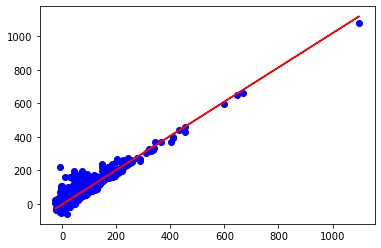

In [11]:
plt.scatter(X[1:10000], Y[1:10000], color = "Blue")
plt.plot(X[1:10000], Y_pred[1:10000], color = "Red")
plt.show()


In [ ]:
#Ajustar el modelo cuando las variables x son categoricas

In [14]:
#Cuantitavas, no problem
X = df[["AirTime", "Distance", "TaxiIn", "TaxiOut"]]

#Categoricas, pasamos a string (1-12) las otras no ya que asi estan en str
df["Month"] = df["Month"].apply(str)
df["DayofMonth"] = df["DayofMonth"].apply(str)
df["DayOfWeek"] = df["DayOfWeek"].apply(str)

#toma valor 1 o 0
dummies = pd.get_dummies(data=df[["Month", "DayofMonth", "DayOfWeek", "Origin", "Dest"]])
X = dummies.add(X, fill_value=0)

In [15]:
X.columns

Index(['AirTime', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'DayofMonth_1',
       'DayofMonth_10',
       ...
       'Origin_VLD', 'Origin_VPS', 'Origin_WRG', 'Origin_WYS', 'Origin_XNA',
       'Origin_YAK', 'Origin_YKM', 'Origin_YUM', 'TaxiIn', 'TaxiOut'],
      dtype='object', length=652)

In [17]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

Y_pred = regr.predict(X)
print("R Cuadrado", r2_score(Y, Y_pred))
#Potencial explicativo muy bajo, 19%

R Cuadrado 0.19026424219702065


In [18]:
X = X.add(df[["DepDelay"]], fill_value=0)

In [19]:
#Ya agregada volvemos ajustar el modelo 
regr = linear_model.LinearRegression()
regr.fit(X, Y)

Y_pred = regr.predict(X)
print("R Cuadrado", r2_score(Y, Y_pred))

R Cuadrado 0.9712926109411798
